In [2]:
from keras.preprocessing.image import ImageDataGenerator
?ImageDataGenerator

In [14]:
#Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
path = 'original_data' 
dst_path = 'gen1_data' 
datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.02,horizontal_flip=True,
                             vertical_flip = True)
gen = datagen.flow_from_directory(path,target_size=(224,224), 
                                  batch_size=2,save_to_dir = dst_path,  
                                  save_prefix= 'gen',save_format='jpg') 
for i in range(100):
    gen.next()

Found 10 images belonging to 1 classes.


In [15]:
#load the image
from keras.preprocessing.image import load_img,img_to_array

img_path = '1.jpg'
img = load_img(img_path,target_size=(224,224))
type(img)

PIL.Image.Image

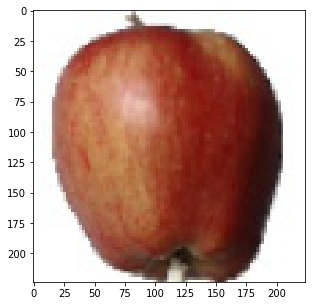

In [16]:
#visualize the image
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.imshow(img)

In [17]:
#transfer the image to array
img = img_to_array(img)
type(img)
print(img.shape)

(224, 224, 3)


In [18]:
#feature extraction 
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet',include_top = False) #drop the top layers.
X = np.expand_dims(img,axis=0)#Because we need to process batch of image, so we need to add one more dimension into the array
X =preprocess_input(X)#preprocess the array and convert it into ready-to-use input format for vgg16 computation
print(X.shape) #So the very first dimension means the Ith image.


(1, 224, 224, 3)


In [19]:
features = model_vgg.predict(X)#Since we already remove the top output layer, we can extract the information we need directly
print(features.shape) #shape before flatten

(1, 7, 7, 512)


In [20]:
#flatten
features = features.reshape(1,7*7*512) #flatten the result into one row, 25088 columns format
print(features.shape)

(1, 25088)


In [21]:
#list all the names of the data
import os
folder = 'train1_data'
dirs = os.listdir(folder)

img_path = [] 
for i in dirs:  #To assure that the files we overview are 'jpg' and because we need to get the postfix,we choose[1] instead of [0]
    if os.path.splitext(i)[1] == '.jpg': 
        img_path.append(i)
img_path = [folder + "//" + i for i in img_path]
print(img_path)

['train1_data//gen_8_9528510.jpg', 'train1_data//gen_3_9038887.jpg', 'train1_data//gen_8_1930123.jpg', 'train1_data//gen_2_9906980.jpg', 'train1_data//gen_4_5225745.jpg', 'train1_data//gen_4_7162387.jpg', 'train1_data//gen_8_5742705.jpg', 'train1_data//gen_9_5525416.jpg', 'train1_data//gen_7_1972358.jpg', 'train1_data//gen_4_2475238.jpg', 'train1_data//gen_5_4278670.jpg', 'train1_data//gen_3_439510.jpg', 'train1_data//gen_3_5130880.jpg', 'train1_data//gen_8_94524.jpg', 'train1_data//gen_6_6747725.jpg', 'train1_data//gen_4_3676501.jpg', 'train1_data//gen_6_5327825.jpg', 'train1_data//gen_5_2452204.jpg', 'train1_data//gen_0_3076889.jpg', 'train1_data//gen_7_6591376.jpg', 'train1_data//gen_4_6090011.jpg', 'train1_data//gen_4_7284323.jpg', 'train1_data//gen_4_8698422.jpg', 'train1_data//gen_9_9724275.jpg', 'train1_data//gen_4_9121894.jpg', 'train1_data//gen_6_9547125.jpg', 'train1_data//gen_2_6654294.jpg', 'train1_data//gen_9_8813699.jpg', 'train1_data//gen_7_6413566.jpg', 'train1_data//ge

In [22]:
#define a method to extract the features
def modelProcess(img_path, model):
     img = load_img(img_path, target_size = (224,224))
     img = img_to_array(img)
     X = np.expand_dims(img,axis=0)
     X = preprocess_input(X)
     X_VGG = model.predict(X)
     X_VGG = X_VGG.reshape(1,7*7*512)
     return X_VGG

In [23]:
#Process image in batch. Features_train to store the features of image
features_train = np.zeros([len(img_path),7*7*512])  #len(img_path) = how many images in total
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg) 
    print('preprocessed:',img_path[i]) 
    features_train[i] = feature_i
    

preprocessed: train1_data//gen_8_9528510.jpg
preprocessed: train1_data//gen_3_9038887.jpg
preprocessed: train1_data//gen_8_1930123.jpg
preprocessed: train1_data//gen_2_9906980.jpg
preprocessed: train1_data//gen_4_5225745.jpg
preprocessed: train1_data//gen_4_7162387.jpg
preprocessed: train1_data//gen_8_5742705.jpg
preprocessed: train1_data//gen_9_5525416.jpg
preprocessed: train1_data//gen_7_1972358.jpg
preprocessed: train1_data//gen_4_2475238.jpg
preprocessed: train1_data//gen_5_4278670.jpg
preprocessed: train1_data//gen_3_439510.jpg
preprocessed: train1_data//gen_3_5130880.jpg
preprocessed: train1_data//gen_8_94524.jpg
preprocessed: train1_data//gen_6_6747725.jpg
preprocessed: train1_data//gen_4_3676501.jpg
preprocessed: train1_data//gen_6_5327825.jpg
preprocessed: train1_data//gen_5_2452204.jpg
preprocessed: train1_data//gen_0_3076889.jpg
preprocessed: train1_data//gen_7_6591376.jpg
preprocessed: train1_data//gen_4_6090011.jpg
preprocessed: train1_data//gen_4_7284323.jpg
preprocessed:

preprocessed: train1_data//gen_2_9128600.jpg
preprocessed: train1_data//gen_7_2100953.jpg
preprocessed: train1_data//gen_1_7614906.jpg
preprocessed: train1_data//gen_9_8656932.jpg
preprocessed: train1_data//gen_4_5378851.jpg
preprocessed: train1_data//gen_8_1817227.jpg
preprocessed: train1_data//gen_7_5636206.jpg
preprocessed: train1_data//gen_0_2495970.jpg
preprocessed: train1_data//gen_5_3012046.jpg
preprocessed: train1_data//gen_6_9811641.jpg
preprocessed: train1_data//gen_1_8510026.jpg
preprocessed: train1_data//gen_7_45320.jpg
preprocessed: train1_data//gen_5_6089283.jpg
preprocessed: train1_data//gen_0_4598339.jpg
preprocessed: train1_data//gen_5_7156282.jpg
preprocessed: train1_data//gen_4_8584486.jpg
preprocessed: train1_data//gen_1_1011774.jpg
preprocessed: train1_data//gen_4_1421492.jpg
preprocessed: train1_data//gen_9_3791739.jpg
preprocessed: train1_data//gen_0_4162658.jpg
preprocessed: train1_data//gen_9_5098150.jpg
preprocessed: train1_data//gen_1_6719857.jpg
preprocessed

In [24]:
print(features_train.shape) #230 images

(230, 25088)


In [25]:

X= features_train

In [26]:
#Set up Kmeans unsupervised learning
from sklearn.cluster import KMeans
cnn_kmeans = KMeans(n_clusters=2,max_iter=2000)
cnn_kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
#make prediction
y_predict_kmeans = cnn_kmeans.predict(X)
print(y_predict_kmeans)

[1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1
 0 0 0 1 0 0 0 1]


In [33]:
from collections import Counter  #We have 210 Positive Sample, but only 127 of them here are segmeneted correctly.
print(Counter(y_predict_kmeans))  

Counter({1: 127, 0: 103})


In [34]:
normal_apple_id = 1

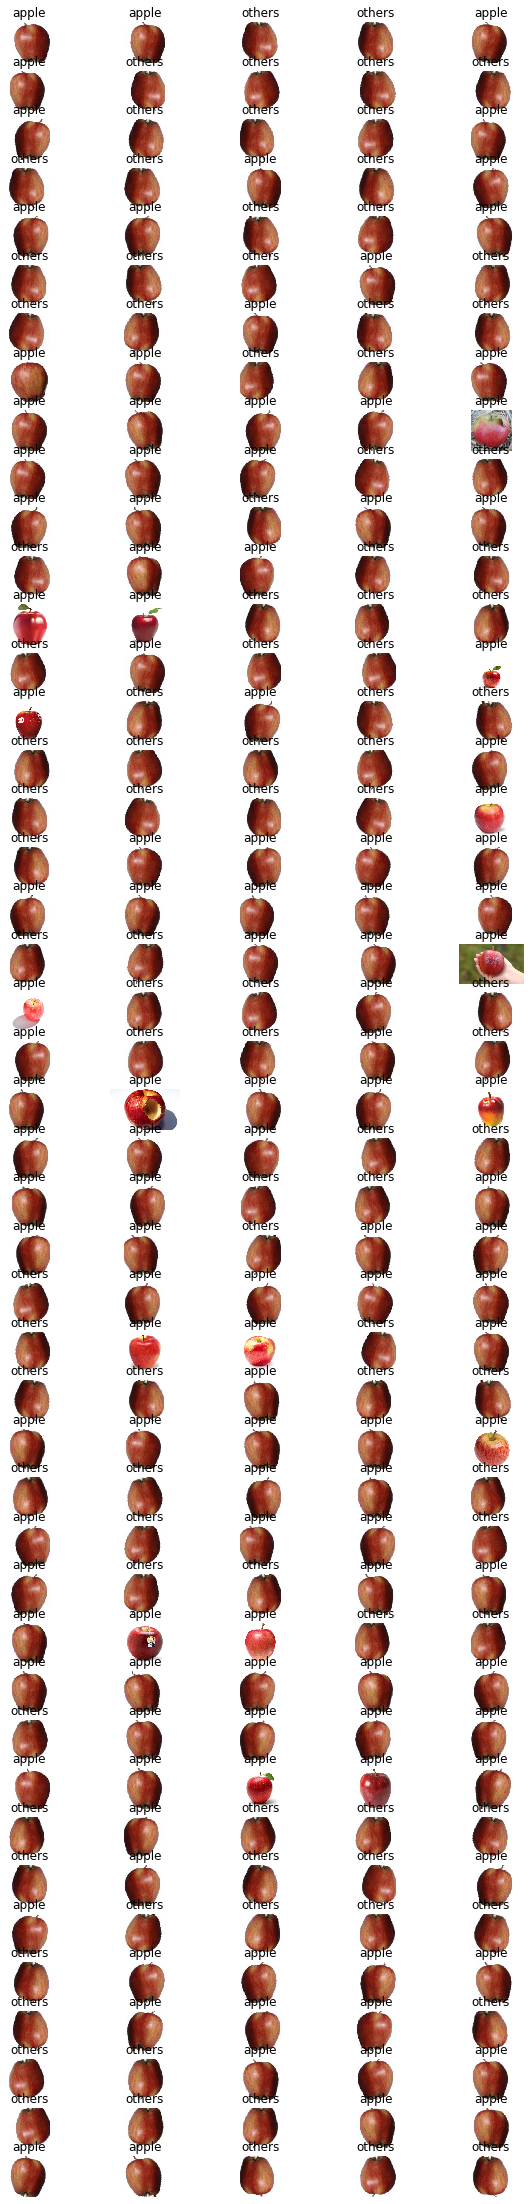

In [38]:
#visualize the result     
fig2 = plt.figure(figsize=(10,40))
for i in range(45):
    for j in range(5):
        img = load_img(img_path[i*5+j]) #i*5+j: load 5 images each row，i stands for ith row，j represents the jth image in each row
        plt.subplot(45,5,i*5+j+1) 
        plt.title('apple' if y_predict_kmeans[i*5+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')  
        #After we visualized them,we can see that most of the regular apples are labelled as 'others', which is wrong.


In [40]:
#list all the names of the data
import os
folder_test = 'test1_data'
dirs_test = os.listdir(folder_test)

img_path_test = [] #set up a empty list for storing. 
for i in dirs_test: #进行里面的所有名称遍历
    if os.path.splitext(i)[1] == '.jpg': 
        img_path_test.append(i)
img_path_test = [folder_test+ "//" + i for i in img_path_test]
print(len(img_path_test))

12


In [43]:
features_test = np.zeros([len(img_path_test),7*7*512])  
for i in range(len(img_path_test)):
    feature_i = modelProcess(img_path_test[i],model_vgg) 
    print('preprocessed:',img_path_test[i]) 
    features_test[i] = feature_i
X_test = features_test  

preprocessed: test1_data//xx_8_5910781.jpg
preprocessed: test1_data//xx_7_4698934.jpg
preprocessed: test1_data//xx_0_1133520.jpg
preprocessed: test1_data//xx_2_1588073.jpg
preprocessed: test1_data//xx_3_3378731.jpg
preprocessed: test1_data//xx_1_586816.jpg
preprocessed: test1_data//xx_14_6969294.jpg
preprocessed: test1_data//xx_12_5963907.jpg
preprocessed: test1_data//xx_9_3279522.jpg
preprocessed: test1_data//3.jpg
preprocessed: test1_data//1.jpg
preprocessed: test1_data//xx_5_4481562.jpg


In [44]:
print(X_test.shape)

(12, 25088)


In [46]:
y_predict_kmeans_test = cnn_kmeans.predict(X_test)
print(y_predict_kmeans_test)

[1 1 0 1 1 1 1 1 1 0 0 1]


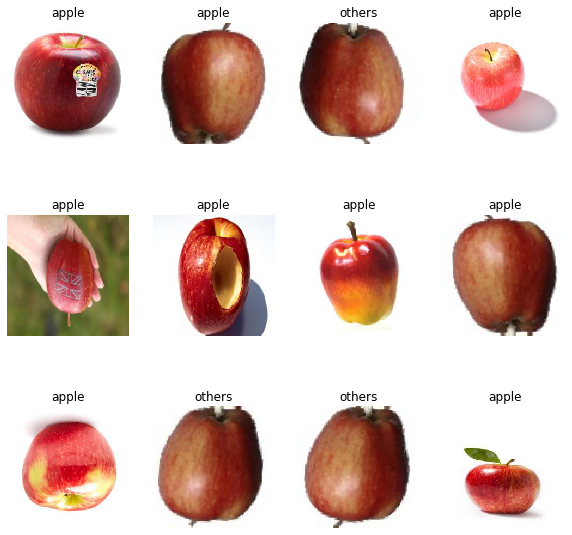

In [48]:
#visualize the result     
fig3 = plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        img = load_img(img_path_test[i*4+j]) 
        plt.subplot(3,4,i*4+j+1) #+1here, because the subplot basically starts from 1 rather than 0
        plt.title('apple' if y_predict_kmeans_test[i*4+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')  

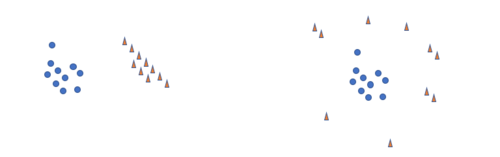

In [54]:
#meanshift
from sklearn.cluster import MeanShift,estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(X,n_samples=140)
print(bw) #bw indicates the size of our 'scanning window'
#set up meanshift model
cnn_ms = MeanShift(bandwidth=bw)
cnn_ms.fit(X) #只需要找到主要的样本数量它的id是什么，命名为普通苹果，这些id之外的可以理解为其他苹果，可以理解为一个非监督式的二分类
#Slightly different from the previous Kmeans model, we need to find out what are the most prevalant sample type here
#which is 0 here, so we going to set 0 as 'regular apple' or Positive sample here. Anything other than 0 can be treated
#as negative sample. We can treated it like an unsupervised binary classification method.


1236.8087152690234


MeanShift(bandwidth=1236.8087152690234, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [55]:
#make prediction
y_predict_ms = cnn_ms.predict(X)
print(y_predict_ms)  #0 is regular apple here, while anything other than 0 is 'others'

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  7  4  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 11  6  0  0  0  0  0  0  0  0  0  0 10  0  0  3  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  2
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [56]:
print(Counter(y_predict_ms))

Counter({0: 218, 1: 1, 12: 1, 7: 1, 4: 1, 11: 1, 6: 1, 10: 1, 3: 1, 9: 1, 8: 1, 2: 1, 5: 1})


In [57]:

normal_apple_id = 0

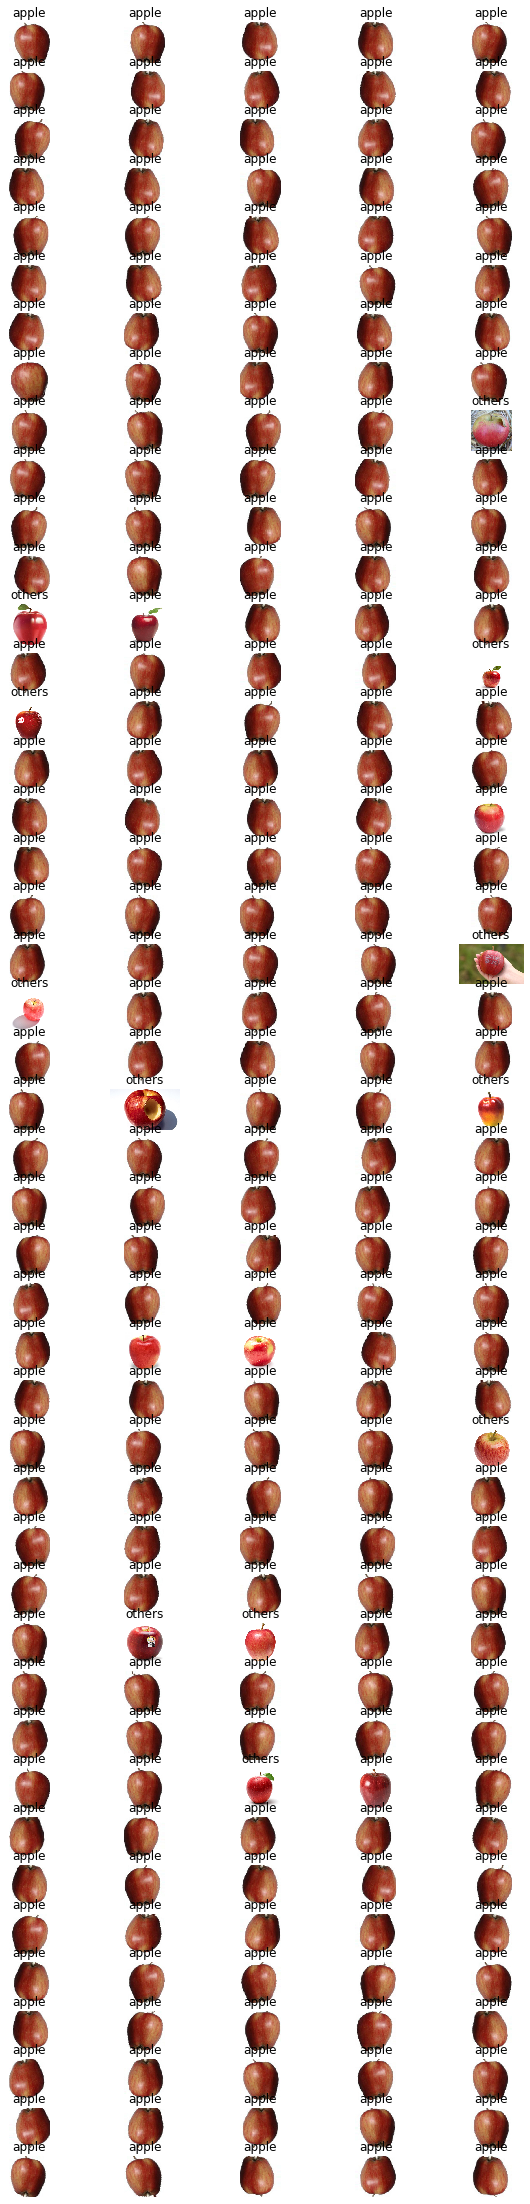

In [58]:
#visualize the result     ]
fig4 = plt.figure(figsize=(10,40))
for i in range(45):
    for j in range(5):
        img = load_img(img_path[i*5+j]) 
        plt.subplot(45,5,i*5+j+1) 
        plt.title('apple' if y_predict_ms[i*5+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')

In [60]:
y_predict_ms_test = cnn_ms.predict(X_test)
print(y_predict_ms_test)

[ 8  0  0  0  0 10  3  0  0  0  0  7]


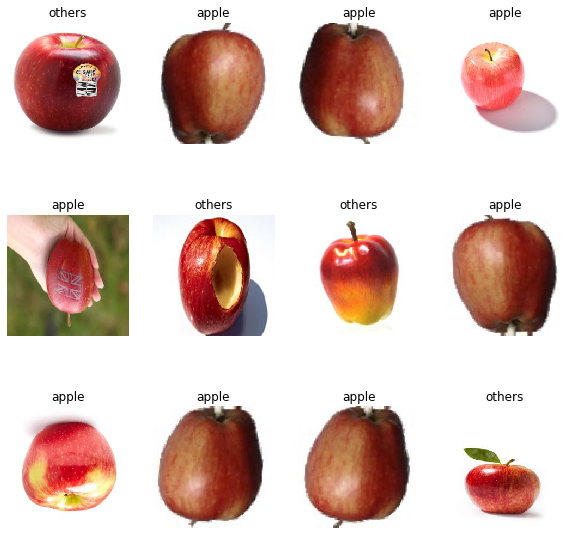

In [61]:
#visualize the result     
fig5 = plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        img = load_img(img_path_test[i*4+j]) 
        plt.subplot(3,4,i*4+j+1)
        plt.title('apple' if y_predict_ms_test[i*4+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')

Meanshift did a much better job than Kmeans.Since we run the unsupervised learning model on a 224*224 dimension bases, we surely take a lot of noises into computation as well. PCA or Anomaly detection come to rescue.PCA can help us to filter out less important informations and noises as well.

In [62]:
#PCA dimension reduction
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
X_norm =stds.fit_transform(X)
#PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=200) #used to be 224*224 
X_pca = pca.fit_transform(X_norm)

In [64]:
#calculate the variance ratio, the closer the sum(var_ratio) to one, the more major features we successfully keep.
var_ratio = pca.explained_variance_ratio_  
print(np.sum(var_ratio))

0.9829910159980431


In [66]:
#data shape after reduction
print(X_pca.shape,X.shape) 

(230, 200) (230, 25088)


In [67]:
#meanshift after dimension reduction
from sklearn.cluster import MeanShift,estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(X_pca,n_samples=140)
print(bw) 
#set up meanshift model
cnn_pca_ms = MeanShift(bandwidth=bw)
cnn_pca_ms.fit(X_pca)  

151.07751163606673


MeanShift(bandwidth=151.07751163606673, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [68]:
#make prediction
y_predict_pca_ms = cnn_pca_ms.predict(X_pca)
print(y_predict_pca_ms)

[ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  4  9  0  0  0  0  0  0  0 13  8  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2 12  0  0  0  0  0  0  0  0  0  0  6  0  0 11  0  0  0  0  0
  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0 14  7 19  0  0  0  0  0
  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 15  0  0 18  0  0  0  0  0
  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 20  0  0  0  0  0  0  0]


In [70]:

print(Counter(y_predict_pca_ms))  

Counter({0: 208, 22: 1, 21: 1, 1: 1, 4: 1, 9: 1, 13: 1, 8: 1, 2: 1, 12: 1, 6: 1, 11: 1, 16: 1, 14: 1, 7: 1, 19: 1, 5: 1, 3: 1, 10: 1, 15: 1, 18: 1, 17: 1, 20: 1})


In [ ]:
normal_apple_id = 0

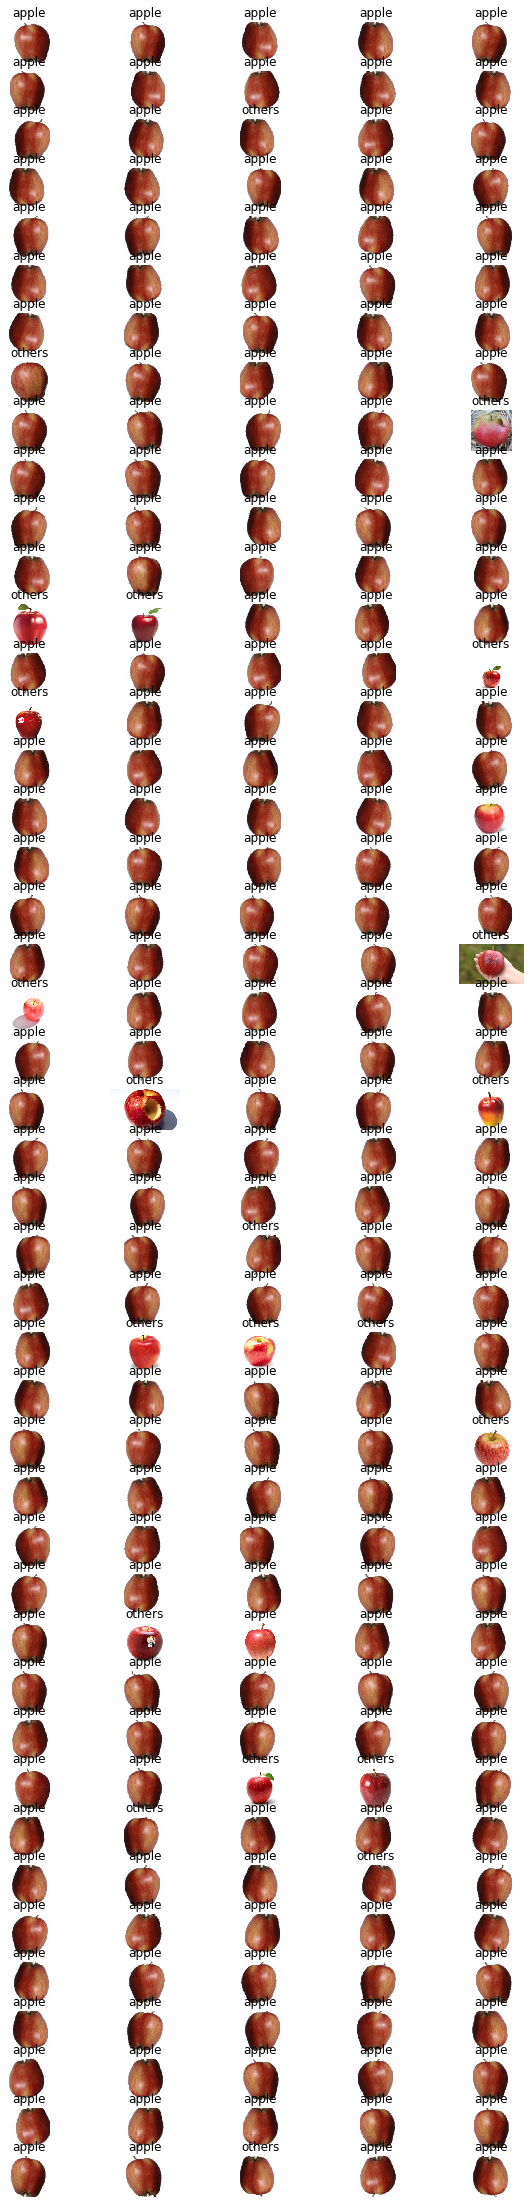

In [71]:
#visualize the result     
fig6 = plt.figure(figsize=(10,40))
for i in range(45):
    for j in range(5):
        img = load_img(img_path[i*5+j]) 
        plt.subplot(45,5,i*5+j+1) 
        plt.title('apple' if y_predict_pca_ms[i*5+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')  #Better at detecting 'others' apple

In [72]:
X_norm_test = stds.transform(X_test) #X_test feature scaling
X_pca_test = pca.transform(X_norm_test) 

In [74]:
y_predict_pca_ms_test = cnn_pca_ms.predict(X_pca_test)
print(y_predict_pca_ms_test)

[ 3  0  0  7 17  6 11  0  0  0  0 13]


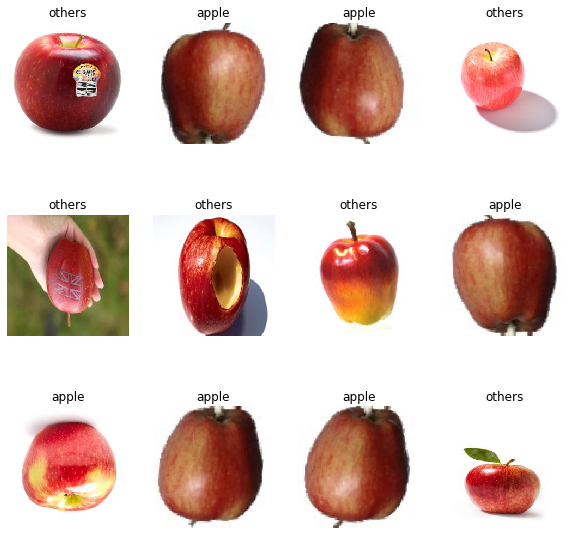

In [75]:
#visualize the result     
fig7 = plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        img = load_img(img_path_test[i*4+j]) 
        plt.subplot(3,4,i*4+j+1) 
        plt.title('apple' if y_predict_pca_ms_test[i*4+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off') #approximately 92% accuracy